In [1]:
import numpy as np
from DFReadResults import *

In [ ]:
filepath = "output/"
file_address = filepath + "lipfield_"
time_data = readResultsVariable(file_address, "time_data")

time_simulation = time_data[0]
dt = time_data[1]
n_steps = int(time_simulation/ dt)

# n_steps = time_data[2]
size = int(n_steps / 10 +1)
n_fragments = np.zeros(size)
avg_stress_bar = np.zeros(size)
energies = []
sfrag = []
i = 0
for n in range(n_steps):
    if n%10 ==0:
        results = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments[i] = getResults(results, "n_fragments")
        avg_stress_bar[i] = getResults(results, "avg_stress_bar")
        energies.append(getResults(results, "energies"))
        sfrag.append(getResults(results, "frag_lengths"))
        i += 1

time = np.linspace(0, time_simulation, size)
stress_bar =[["LIP 1250 elements", time, avg_stress_bar/10**6]]
n_frag = [["LIP 1250 elements", time, n_fragments]]

var_energies = computeVarEnergiesLipfield(
    energies, size
)
plotVarEnergiesLipfield(
    var_energies,
    time,
    "filename_save",
    title="LIP: Variation of energy"
)


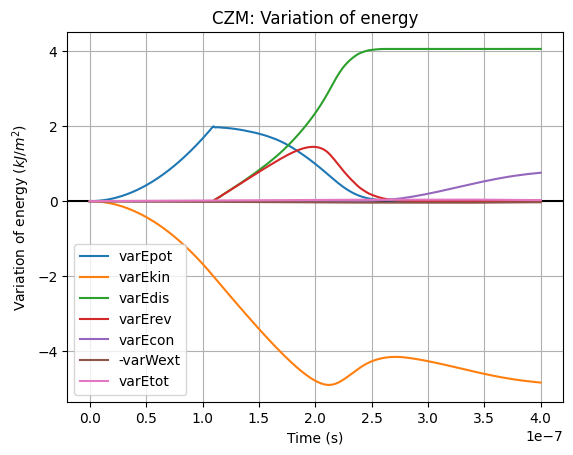

In [2]:
filepath = "output/"
file_address = filepath + "akantu_"
time_data = readResultsVariable(file_address, "time_data")

time_simulation = time_data[0]
dt = time_data[1]
n_steps = int(time_simulation/ dt)

# n_steps = time_data[2]
size = int(n_steps / 10 +1)
n_fragments = np.zeros(size)
avg_stress_bar = np.zeros(size)
energies = []
sfrag = []
i = 0
for n in range(n_steps):
    if n%10 ==0:
        results = readPreviousResults(file_address + "step_" + str(n) +"_.pickle")
        n_fragments[i] = getResults(results, "n_fragments")
        avg_stress_bar[i] = getResults(results, "avg_stress_bar")
        energies.append(getResults(results, "energies"))
        sfrag.append(getResults(results, "frag_lengths"))
        i += 1

time = np.linspace(0, time_simulation, size)
stress_bar = []
n_frag = []
stress_bar.append(["CZM 1250 elements", time, avg_stress_bar/10**6])
n_frag.append(["CZM 1250 elements", time, n_fragments])


var_energies = computeVarEnergiesCZM(
    energies, size, 1250)
plotVarEnergiesCZM(
    var_energies,
    time,
    "filename_save",
    title="CZM: Variation of energy"
)

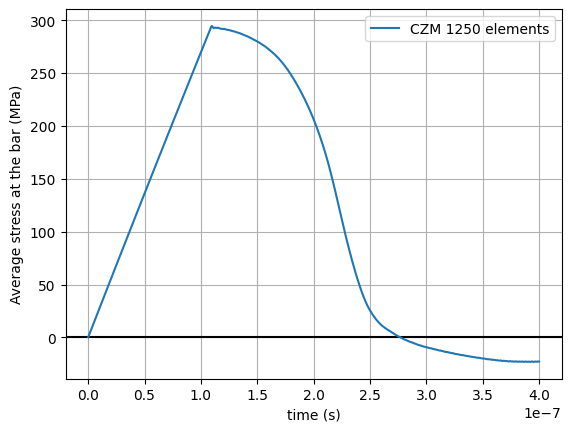

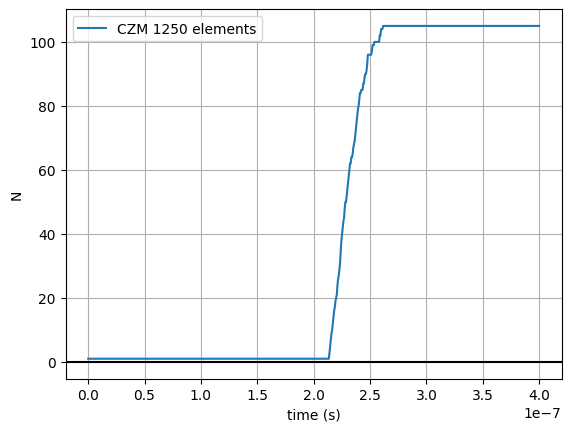

In [3]:
plotResults(
    stress_bar,
    label_x="time (s)",
    label_y="Average stress at the bar (MPa)",
)
plotResults(
    n_frag,
    label_x="time (s)",
    label_y="N",
)
